# Jupiter! and the KAM theorem

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 4.4)

© 2016, James Sethna, all rights reserved.

This exercise mostly uses classical mechanics to illustrate the KAM theorem. As such, we won't do much programming -- we'll implement Netwton's law of gravitation, set up the planets, and work out the details of the Poincaré section for you. It's your job to understand and explain the implications for statistical mechanics.

The foundation of statistical mechanics is the *ergodic hypothesis*:
any large system will explore the entire energy surface. We focus on
large systems because it is well known that many systems with a few
interacting particles are definitely not ergodic.

The classic example of a non-ergodic system is the Solar System. Jupiter
has plenty of energy to send the other planets out of the Solar
System. Most of the phase-space volume of the energy surface has eight planets
evaporated and Jupiter orbiting the Sun alone; the ergodic hypothesis would
doom us to one long harsh winter. So, the big question is:
why has the Earth not been kicked out into interstellar space?

Mathematical physicists have studied this problem for hundreds of years.
For simplicity, they focused on the *three-body problem*: for example,
the Sun, Jupiter, and the Earth.
The early (failed) attempts tried to do perturbation theory in the strength of
the interaction between planets. Jupiter's gravitational force on the
Earth is not tiny, though; if it acted as a constant brake or accelerator,
our orbit would be seriously perturbed in a few thousand years. Jupiter's
effects must cancel out over time rather perfectly ...

This exercise is mostly discussion and exploration.

Import packages. 

(Note: Either %matplotlib or %matplotlib notebook will allow the Poincare launcher to work.)

In [52]:
# Sometimes gives interactive new windows
# Must show() after plot, figure() before new plot
# %matplotlib

# Adds static figures to notebook: good for printing
# %matplotlib inline 

# Interactive windows inside notebook! Must include plt.figure() between plots


# Better than from numpy import *, but need np.sin(), np.array(), plt.plot(), etc.
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib

%matplotlib qt

Set constants. 

Masses in earth masses; radii in AU; time in years

G = 4 * Pi^2 / SunMass

Jovian year frequency = omega = sqrt(G*(JupiterMass+SunMass) / RJ^3) 

Jupiter and the Sun go around in circular orbits about their center of mass, with radii RJcm and RScm. The other constants are just to simplify the typing.

In [24]:
EarthMass = 1.
TrueJupiterMass = 317.83
SunMass = 332830.
RJ = 5.20316
G = 4*np.pi**2 / SunMass

We'll vary Jupiter's mass several times, so we write a routine to reset the frequency of its orbit (omega), and to reset other useful constants. That way we can just pass its mass Mj to the various routines.

In [25]:
def SetOmega(JupiterMass):
    """
    As Jupiter's mass is varied, its orbital angular frequency changes
    """
    return np.sqrt(G*(JupiterMass+SunMass) / RJ**3)

def SetJupiterMass(JupiterMass):
    """
    Usage: 
    JupiterMass, omega, RJcm, RScm, GMeMj, GMeMs = SetJupiterMass(newJupiterMass)
    
    omega is Jupiter's orbital frequency (which in the original app wasn't changed with the mass)
    RJcm is the circular orbit radius Jupiter makes about the center of mass
    RScm is the same for the Sun
    GMeMj and GMeMs are just convenient for Newton's laws
    """
    omega = SetOmega(JupiterMass)
    RJcm = RJ * (SunMass/(JupiterMass+SunMass))
    RScm = RJ * (JupiterMass/(JupiterMass+SunMass))
    GMeMj = G*EarthMass*JupiterMass
    GMeMs = G*EarthMass*SunMass
    return JupiterMass, omega, RJcm, RScm, GMeMj, GMeMs

Standard initial conditions: start Earth along x, with velocity along y. (Jupiter starts along x as well.)

In [26]:
RxEarth0 = 1.
RyEarth0 = 0.
VxEarth0 = 0.
VyEarth0 = 2*np.pi
t0 = 0.

Planetary Motion ('dydt' or 'func' giving time evolution)

In [27]:
def Newton(RV,t,Mj):
    """
    Given time and RV = (Rx, Ry, Vx, Vy) for Earth, returns derivatives of RV wrt time
    """
    JupiterMass, omega, RJcm, RScm, GMeMj, GMeMs = SetJupiterMass(Mj)
    Rx, Ry, Vx, Vy = RV
    # Solar and Jovian positions at time t
    RxJupiter = RJcm * np.cos(omega * t)
    RyJupiter = RJcm * np.sin(omega * t)
    RxSun = - RScm * np.cos(omega * t)
    RySun = - RScm * np.sin(omega * t)
    # vx, vy derivatives are F/M
    REJ = np.sqrt( (RxJupiter-Rx)**2 + (RyJupiter-Ry)**2 );
    RSJ = np.sqrt( (RxSun-Rx)**2 + (RySun-Ry)**2 );
    Fx = GMeMj*(RxJupiter-Rx) / REJ**3 + GMeMs*(RxSun-Rx)/RSJ**3;
    Fy = GMeMj*(RyJupiter-Ry)/REJ**3 + GMeMs*(RySun-Ry)/RSJ**3;
    return np.array([Vx, Vy, Fx/EarthMass, Fy/EarthMass])

Function that plots the Earth's trajectory for a given mass, up to a given time.

In [28]:
def PlotTrajectory(Mj,tMax,dt=0.01):
    plt.figure()
    times = np.arange(0.,tMax,dt)
    Rx, Ry, Vx, Vy = odeint(Newton, [RxEarth0, RyEarth0, VxEarth0, VyEarth0],\
                            times, args=(Mj,)).transpose()
    plt.axes().set_aspect('equal')
    plt.plot(Rx,Ry);
    # plt.savefig("one_hundred_years_orbit")
    plt.show()
    
    

Run for 100 years. Does it look like Jupiter is kicking Earth out of the solar system? Be sure to zoom in (say, to the top arc in the orbit). Estimate the fraction that the Earth's radius from the Sun changes due to Jupiter's varying gravitational pull.

In [54]:
PlotTrajectory(TrueJupiterMass,tMax=100.)

Maybe Jupiter just pulls the earth out and back depending on which side of the Sun it lies? We can check this by looking at Earth's orbit in a rotating reference frame. (If $\hat v = [\cos(\omega t), \sin(\omega t)]$ is a unit vector pointing from the center of mass to Jupiter, and $\bf{R}$ is Earth's position, we're looking at $\hat{\bf{v}} \cdot \bf{R}$ on the x-axis and $\hat{\bf{v}} \times \bf{R}$ on the y-axis.) Now Jupiter is fixed at $y=0$, $x\sim 5$ Earth orbit radii. Zoom in on the part of the orbit where Earth is closest to Jupiter, and the segment at the top. Is the orbit now a simple closed curve, or is it still tubular in the rotating frame?

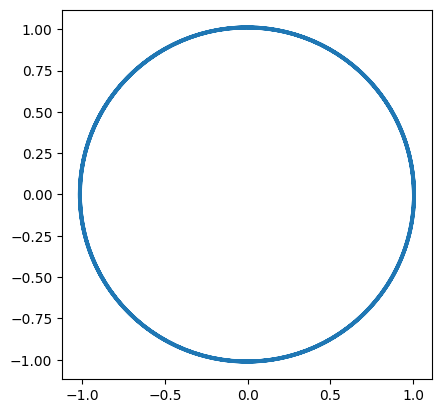

In [30]:
def PlotRotatingFrame(Mj,tMax,dt=0.01):
    omega = SetOmega(Mj)
    plt.figure()
    times = np.arange(0.,tMax,dt)
    Rx, Ry, Vx, Vy = odeint(Newton, [RxEarth0, RyEarth0, VxEarth0, VyEarth0], \
                            times, args=(Mj,)).transpose()
    plt.axes().set_aspect('equal')
    plt.plot(Rx*np.cos(omega*times)+Ry*np.sin(omega*times), Ry*np.cos(omega*times)-Rx*np.sin(omega*times)); 

PlotRotatingFrame(TrueJupiterMass,12.)

The $n^{th}$ time Jupiter passes by, the Earth is shifted no further than the first time. Jupiter thus warps Earth's orbit into a kind of spiral around a tube. This orbit in physical three-dimensional space is a projection of the tube in dimensional phase space.  Jupiter thus warps Earth's orbit into a kind of spiral around a tube. This orbit in physical three-dimensional space is a projection of the tube in 6N-dimensional phase space.

Now try increasing Jupiter's mass to 31000 Earth masses. (The book says 35000, but it's a little less fun.) What happens? What are the tiny loops? If you increase the time, does the Earth leave the Solar System?

In [55]:
PlotTrajectory(Mj=31000,tMax=100.)

The tube in phase space already exists for massless planets...

Let us start in the non-interacting planet approximation (where Earth and
Jupiter are assumed to have zero mass). Both Earth's orbit and Jupiter's orbit
then become circles, or more generally ellipses. The field of topology
does not distinguish an ellipse from a circle; any stretched, 'wiggled' rubber
band is a circle so long as it forms a curve that closes into a loop.
Similarly, a torus (the surface of a doughnut) is topologically equivalent
to any closed surface with one hole in it (like the surface of a coffee cup,
with the handle as the hole). Convince yourself in this non-interacting
approximation that Earth's orbit remains topologically a circle in its
six-dimensional phase space.

In the non-interacting planet approximation, what topological surface is it that contains the trajectory of the Earth, Jupiter, and the Sun? Choose between (i) sphere, (ii) torus, (iii) Klein bottle, (iv) two-hole torus, or (v) complex projective plane. About how many times does the Earth wind around this surface during each Jovian year?

The mathematical understanding of the three-body problem was only solved in the
past hundred years or so, by Kolmogorov, Arnol'd, and Moser. Their proof
focuses on the topological integrity of this tube in phase space (called
now the KAM torus). The KAM theorem tells us that the motion stays on a surface with the same topology even when Jupiter's mass becomes non-zero -- but only if Jupiter's year is a 'sufficiently irrational' number of Earth years. This protects the Earth from flying out of the solar system.

More specifically, they could prove in this case that for
sufficiently small planetary masses there is a distorted torus in
phase space, near the unperturbed one, around which the planets
spiral around with the same winding number. About how large can you make Jupiter's mass before Earth's orbit stops looking like a torus? Admire the surface formed at large masses before the surface changes.

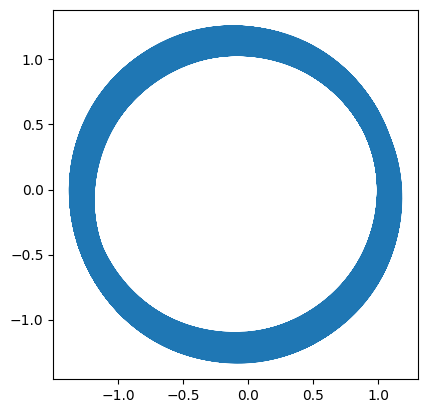

In [37]:
PlotTrajectory(Mj=5000,tMax=1000)

(You may find that there are regions of unstable motion followed by regions of stable tori, and the behavior depends on the initial condition; there is no single correct answer for the largest mass before the torus disappears. Also, if you look in the rotating frame, interesting things happen before the Earth departs the Solar System.)

We will explore these using a Poincaré section...

The fact that the motion is stabilized by this invariant surface is a serious problem for statistical mechanics! The orbit does not explore the entire allowed energy surface. Our climate would be very unpleasant, on the average, if our orbit were ergodic.

The Poincaré section shown in Fig. 4.8 in the text is a planar
cross-section
in a three-dimensional phase space. Can we reduce our problem to an
interesting problem with three phase-space coordinates?
The original problem has an eighteen-dimensional phase space.
In the center of mass frame it has twelve interesting dimensions. If we
restrict the motion to a plane, it reduces to eight dimensions. If we
assume that the mass of the Earth is zero (the *restricted* planar
three-body problem)
we have five relevant coordinates (Earth $xy$ positions and velocities,
and the location of Jupiter along its orbit).
If we remove one more variable by going to a rotating coordinate system that
rotates with Jupiter, the current state of our model can be described with four
numbers: two positions and two momenta for the Earth. We can remove another
variable by confining ourselves to a fixed 'energy'. The true energy of the
Earth is not conserved (because Earth feels a periodic potential), but there
is a conserved quantity which is like the energy in the rotating frame. 
This leaves us with a trajectory
in three dimensions (so, for small Jovian masses, we have a torus
embedded in a three-dimensional space). Finally, we take a Poincaré
cross-section; we plot a point of the trajectory every time Earth passes
directly between Jupiter and the Sun.  We plot the distance to Jupiter
along the horizontal axis, and the velocity component towards Jupiter
along the vertical axis; the perpendicular component of the velocity
is not shown (and is determined by the 'energy').

Let us use a Poincaré section to explore these tori and the chaotic regions between them. We want to take a snapshot of the position of the Earth each time it passes Jupiter. We need to interpolate between our trajectory points (using a spline), and find out where the snapshot times should be, and then report the corresponding positions. Rather than returning all four positions, we can go into the rotating frame and report the 'radial' position and velocity along the direction pointing to Jupiter. (The angular position is zero by the rules of the snapshot. The angular velocity is set by the total energy.)

In [38]:
from scipy.interpolate import InterpolatedUnivariateSpline

def PoincareIntersections(Rx,Ry,Vx,Vy,times,Mj):
    """
    Returns coordinates where Earth passes through Jupiter's line through the origin, 
    with positive y velocity in rotating frame
    """
    omega = SetOmega(Mj)
    SJ = np.sin(omega*times) # Note these operations work on the whole array of times at once
    CJ = np.cos(omega*times)
    check = Rx*SJ - Ry*CJ   # Zero if Earth and Jupiter are in same line with the origin (and hence with the Sun)
    checkI = InterpolatedUnivariateSpline(times, check)
    tZeroBothDirections = checkI.roots() # Finds interpolated times where they cross
    # direction = True for those where Earth passes with positive velocity
    direction = (checkI.derivative()(tZeroBothDirections) < 0.)     
    tZero = np.array([tZ for tZ, d in zip(tZeroBothDirections, direction) if d])
    # Interpolate four coordinates. (Could interpolate r_radial and v_radial instead.)
    RxI = InterpolatedUnivariateSpline(times, Rx)
    RyI = InterpolatedUnivariateSpline(times, Ry)
    VxI = InterpolatedUnivariateSpline(times, Vx)
    VyI = InterpolatedUnivariateSpline(times, Vy)
    r_radial = RxI(tZero)*np.cos(omega*tZero) + RyI(tZero)*np.sin(omega*tZero)
    v_radial = VxI(tZero)*np.cos(omega*tZero) + VyI(tZero)*np.sin(omega*tZero)
    
    return r_radial, v_radial

Try a Poincaré plot for Jupiter's true mass.

In [39]:
def PoincarePlot(Mj,tMax,dt=0.01):
    plt.figure()
    times = np.arange(0.,tMax,dt)
    Rx, Ry, Vx, Vy = odeint(Newton, [RxEarth0, RyEarth0, VxEarth0, VyEarth0], \
                            times, args=(Mj,)).transpose()
    r, v = PoincareIntersections(Rx, Ry, Vx, Vy, times, Mj)
    plt.plot(r,v,'r.');

In [59]:
PoincarePlot(TrueJupiterMass,tMax=500.)

Notice that the trajectory forms a closed curve. This curve is the intersection of a KAM torus with the Poincaré cross section. Does the range of r coordinates roughly correspond to the range of maximum x-coordinates you saw in the rotating reference frame for the true Jupiter mass above?

Try a Poincaré plot for a mass of 22000.

In [58]:
PoincarePlot(Mj=22000.,tMax=500.)

This time we have something that looks like three closed curves, but is noticeably irregular. Something is very roughly repeating every third time Earth crosses Jupiter's angle. It represents the Earth in 'resonance' with Jupiter -- every third time it crosses Jupiter's angle, it returns roughly to the same point. (Resonances are often associated with 'mode locking', where the Earth's year becomes an integer multiple of Jupiter's year.) The irregularity, we shall see, is a sign of chaotic motion -- something that happens near resonances. 

The trajectory in the rotating reference frame also looks funky. 

In [60]:
PlotRotatingFrame(Mj=22000.,tMax=500.)

Would other initial conditions, with this same mass, look maybe more like the original KAM torus? (After all, you found trajectories for larger Jupiter masses that looked like tori earlier: 22000 is a weird interlude with mode locking.) To test this, we want to launch many trajectories at the same 'energy' (the conserved integral of motion in the rotating reference frame).

In [43]:
def RotatingFrameEnergy(RV, t, Mj):
    """
    Given time and RV = (Rx, Ry, Vx, Vy) for Earth, returns the conserved 'rotating reference frame' energy
    """
    JupiterMass, omega, RJcm, RScm, GMeMj, GMeMs = SetJupiterMass(Mj)
    Rx, Ry, Vx, Vy = RV
    # Kinetic Energy in rotating frame
    KineticEnergy = 0.5 * EarthMass * (Vx**2+Vy**2) + EarthMass*omega*(Vx*Ry-Vy*Rx)
    # Solar and Jovian positions at time t
    RxJupiter = RJcm * np.cos(omega * t);
    RyJupiter = RJcm * np.sin(omega * t);
    RxSun = - RScm * np.cos(omega * t);
    RySun = - RScm * np.sin(omega * t);
    REJ = np.sqrt( (RxJupiter-Rx)**2  + (RyJupiter-Ry)**2 );
    RES = np.sqrt( (RxSun-Rx)**2 + (RySun-Ry)**2 );
    PotentialEnergy = -GMeMj/REJ - GMeMs/RES
    return PotentialEnergy+KineticEnergy
    

Just to check, for the default initial conditions and true Jupiter mass, the rotating frame energy is around -22.88...

In [44]:
print(RotatingFrameEnergy([RxEarth0, RyEarth0, VxEarth0, VyEarth0],t0,TrueJupiterMass));

-22.881057818321565


We define a function that, given the two coordinates r_radial and v_radial we plot on the Poincaré section, gives initial conditions that launch the Earth with the current energy in the right direction.

In [45]:
def EnergySurfaceInitial(r_radial, v_radial, Current_Energy, Mj):
    """
        Given Jupiter, Earth, and Sun are in a line with the Earth between Jupiter and the Sun, find initial conditions
        that will give a trajectory at a given rotating reference frame energy.
        
        Assumes new trajectory is launched with the three bodies along the x-axis, so solves for Vy given Rx, Vx.
        
        Doesn't do anything if v_radial too large for solution (too much radial kinetic and potential energy already)
        prints 'verboten' if so.
    """
    JupiterMass, omega, RJcm, RScm, GMeMj, GMeMs = SetJupiterMass(Mj)
    Rx = r_radial
    Vx = v_radial
    Ry = 0.
    RxJupiter = RJcm
    RxSun = -RScm
    Potential_Energy = -GMeMj/abs(RxJupiter-Rx) -GMeMs/abs(RxSun-Rx)
    C = -Current_Energy + Potential_Energy + 0.5 * EarthMass*Vx**2
    discriminant = omega**2 * Rx**2 - 2*C/EarthMass
    if discriminant > 0:
        Vy = omega * Rx + np.sqrt(discriminant)
        return np.array([Rx, Ry, Vx, Vy])
    else:
        print('verboten')
        return None

Test it by seeing if it gives the right initial y-velocity for the default initial conditions and true Jupiter mass. Do they look familiar?

In [46]:
CurrentEnergy=RotatingFrameEnergy([RxEarth0,RyEarth0,VxEarth0,VyEarth0],t0,TrueJupiterMass)
EnergySurfaceInitial(RxEarth0,VxEarth0,CurrentEnergy,TrueJupiterMass)

array([1.        , 0.        , 0.        , 6.28318531])

We now define a function that takes a mouse click event on the plot (event.xdata giving the radial Earth position and event.ydata giving its radial velocity), launches a trajectory with that initial condition on the energy surface, and returns the Poincaré intersections for that trajectory.

In [47]:
class PoincareLauncher:
    def __init__(self, Mj, tMax=50.):
        self.Mj = Mj
        self.tMax = tMax
        omega = SetOmega(Mj)
        self.omega = omega
        self.Current_Energy = RotatingFrameEnergy([RxEarth0,RyEarth0,VxEarth0,VyEarth0],\
                                                  t0,Mj)
        self.times = np.arange(t0,tMax,0.02)
        Rx, Ry, Vx, Vy = odeint(Newton,[RxEarth0, RyEarth0, VxEarth0, VyEarth0],\
                                self.times,args=(self.Mj,)).transpose()
        r, v = PoincareIntersections(Rx,Ry,Vx,Vy,self.times,self.Mj)
        fig = plt.figure("Poincaré Section, Mj=%s"%self.Mj)
        plt.plot(r,v,'.')
        plt.show()
        self.cid = fig.canvas.mpl_connect('button_press_event', self);

    def __call__(self, event):
        Rx = event.xdata
        Vx = event.ydata
        initial = EnergySurfaceInitial(Rx, Vx, self.Current_Energy, self.Mj)
        if initial is not None:
            Rx,Ry,Vx,Vy = odeint(Newton,initial,self.times,args=(self.Mj,)).transpose()
            r, v = PoincareIntersections(Rx,Ry,Vx,Vy, self.times, self.Mj)
            plt.figure("Poincaré Section, Mj=%s"%self.Mj)
            plt.plot(r,v,'.')
            plt.draw();

We can now use PoincareLauncher to form an interactive window that allows us to explore the dynamics as a function of the initial condition. Click on the plot and see new orbits launched! Compare the Poincaré intersection rings with the corresponding full orbits.

Notice that there are initial conditions that do not exist on the energy surface chosen. If you open the plot window outside the notebook (with %matplotlib at the beginning), it will print "verboten", but inside the notebook it will silently refuse to launch.

In [53]:
launcher = PoincareLauncher(Mj=22000.,tMax=1000.)

verboten
verboten
verboten
verboten


Notice that the Rotating Reference Frame figure may be hidden behind the Poincaré section figure. 

Click on points in the plot to launch new trajectories. Can you find an orbit that is periodic (returns to the same point after three crossings)? What do the orbits look like in the rotating reference frame? The orbits near this periodic orbit, forming a torus which winds in a four-fold pattern in the rotating reference frame, are called *mode locked*. 

Can you find initial conditions that give KAM tori that are more like those for small Jupiter masses (that is, that intersect the Poincaré surface only once)? Do the orbits in the rotating reference frame look like deformed tori? (Notice that the KAM tori are squashed and twisted: they are topologically still tori.) 

Can you find regions that look chaotic? Can you find a five-fold pattern in the rotating reference frame? Nine-fold?

Notice that the chaotic orbit does not throw the Earth
  out of the Solar System. The chaotic regions near infinity and near
  our initial condition are not connected. This may be an artifact of
  our low-dimensional model; in other larger systems it is believed that
  all chaotic regions (on a connected energy surface) are joined through
  *Arnol'd diffusion*.

It turns out that proving that Jupiter's effects cancel out depends
on Earth's smoothly averaging over the surface of the torus. If Jupiter's
year is a rational multiple of Earth's year, the orbit closes after a few years
and you do not average over the whole torus; only a closed spiral. Rational
winding numbers, we now know, lead to chaos when the interactions are
turned on; the large chaotic region you found above is associated with
an unperturbed orbit with a winding ratio of 3:1 (hence the three
circles). Disturbingly,
the rational numbers are dense; between any two KAM tori there
are chaotic regions, just because between any two irrational numbers there
are rational ones. It is even worse; it turns out that numbers
which are extremely close to rational (Liouville numbers like
$1+1/10 + 1/10^{10} + 1/10^{10^{10}} + \dots$) may also lead to chaos. It was
amazingly tricky to prove that lots of tori survive nonetheless. You can
imagine why this took hundreds of years to understand (especially without
computers to illustrate the tori and chaos graphically).

Try other masses.

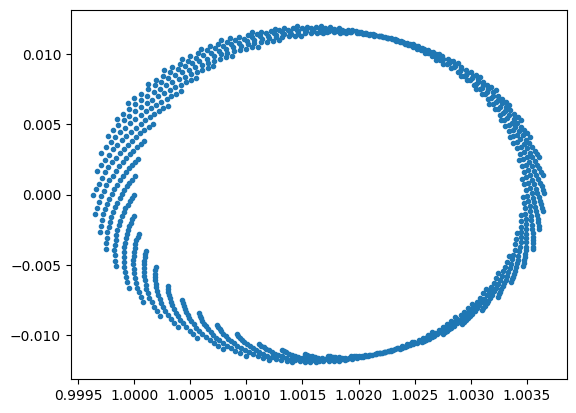

In [141]:
launcher = PoincareLauncher(Mj=100,tMax=1000.)